# 1.0 Imports

In [2]:
import warnings 
warnings.filterwarnings('ignore')

# data manipulation
import pickle
import pandas as pd
import numpy as np

# EDA
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import chi2_contingency

In [10]:
# loads data set
loan_data = pd.read_csv('data/loan_data.csv')

# checks the first five rows of the data
loan_data.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,...,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,wtd_loans,interest_rate,int_rate2,num_rate,numrate,int_rate3
0,571203,18000,18000,60 months,10.16,383.87,10+ years,MORTGAGE,72804.0,Current,...,13263.18,7273.77,4736.82,2536.95,NaN,NaN,10.16%,NaN,NaN,10.16
1,694891,15675,15675,36 months,8.90,497.74,10+ years,MORTGAGE,100000.0,Current,...,15294.25,496.78,380.75,116.03,NaN,NaN,8.90%,NaN,NaN,8.90
2,784712,16500,16500,60 months,7.90,333.78,2 years,MORTGAGE,42000.0,Late (31-120 days),...,12966.64,5000.85,3533.36,1467.49,NaN,NaN,7.90%,NaN,NaN,7.90
3,843448,5500,5500,36 months,13.67,187.10,3 years,RENT,55000.0,Fully Paid,...,0.00,5792.14,5500.00,292.14,NaN,NaN,13.67%,NaN,NaN,13.67
4,974654,6400,6400,36 months,15.80,224.38,2 years,RENT,34000.0,Current,...,4430.59,2912.26,1969.41,942.85,NaN,NaN,15.80%,NaN,NaN,15.80


In [11]:
# checks the structure of the data set
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10000 non-null  int64  
 1   loan_amnt               10000 non-null  int64  
 2   funded_amnt             10000 non-null  int64  
 3   term                    9524 non-null   object 
 4   int_rate                9524 non-null   float64
 5   installment             9524 non-null   float64
 6   emp_length              9119 non-null   object 
 7   home_ownership          9524 non-null   object 
 8   annual_inc              9524 non-null   float64
 9   loan_status             9524 non-null   object 
 10  purpose                 9524 non-null   object 
 11  addr_state              10000 non-null  object 
 12  dti                     9524 non-null   float64
 13  delinq_2yrs             9524 non-null   float64
 14  earliest_cr_line        9524 non-null  

# 2.0 Descriptive Statistics

In [199]:
# creates a dataset for numerical attributes
num_attributes = loan_data.select_dtypes(include=['int64', 'float64'])

# creates a dataset for categorical attributes
cat_attributes = loan_data.select_dtypes(exclude=['int64', 'float64'])

In [14]:
# checks the operation
num_attributes.sample(2)

,id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,open_acc,...,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,wtd_loans,interest_rate,num_rate,numrate,int_rate3
4086,1495730,10750,10750,14.09,367.88,40000.0,25.95,0.0,NaN,6.0,...,20.0,0.00,11572.61,10750.00,822.61,NaN,NaN,NaN,NaN,14.09
8861,7727491,5400,5400,8.60,170.72,65000.0,20.34,0.0,NaN,16.0,...,22.0,4866.37,682.68,533.63,149.05,NaN,NaN,NaN,NaN,8.60


In [17]:
# checks the operation
cat_attributes.sample(2)

,term,emp_length,home_ownership,loan_status,purpose,addr_state,earliest_cr_line,int_rate2
623,60 months,6 years,RENT,Current,debt_consolidation,CA,2000-06-07 11:42:00,20.99%
8624,36 months,2 years,MORTGAGE,Current,debt_consolidation,CO,2001-05-28 01:37:00,12.99%


In [18]:
# central tendency: mean, median
mean = pd.DataFrame(num_attributes.apply(np.mean)).T
median = pd.DataFrame(num_attributes.apply(np.median)).T

# distribution: std, min, max, range, skew, kurtosis
std = pd.DataFrame(num_attributes.apply(np.std)).T
min_value = pd.DataFrame(num_attributes.apply(min)).T
max_value = pd.DataFrame(num_attributes.apply(max)).T
range_value = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
skewness = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
kurtosis = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenates
summary_stats = pd.concat([min_value, max_value, range_value, mean, median, std, skewness, kurtosis]).T.reset_index()
summary_stats.columns = ['attributes','min','max','range','mean','median','std','skewness','kurtosis']

In [19]:
# checks the operations
summary_stats

,attributes,min,max,range,mean,median,std,skewness,kurtosis
0,id,571203.00,10125066.00,9553863.00,5.143648e+06,5605038.5,2.827802e+06,0.034461,-1.303277
1,loan_amnt,1000.00,35000.00,34000.00,1.405481e+04,12000.0,8.108253e+03,0.751678,-0.034505
2,funded_amnt,1000.00,35000.00,34000.00,1.405273e+04,12000.0,8.107288e+03,0.752253,-0.032891
3,int_rate,6.03,26.06,20.03,1.427785e+01,NaN,4.429927e+00,0.247727,-0.465129
4,installment,30.44,1388.45,1358.01,4.426266e+02,NaN,2.445093e+02,0.932005,0.835268
5,annual_inc,7500.00,1000000.00,992500.00,7.165575e+04,NaN,4.536045e+04,5.006879,61.214623
6,dti,0.00,34.98,34.98,1.714693e+01,NaN,7.591202e+00,0.131991,-0.647027
7,delinq_2yrs,0.00,11.00,11.00,2.387652e-01,NaN,6.914192e-01,4.944462,39.205653
8,mths_since_last_delinq,NaN,NaN,122.00,3.498854e+01,NaN,2.147189e+01,0.463538,-0.763403
9,open_acc,1.00,39.00,38.00,1.104378e+01,NaN,4.560789e+00,0.935223,1.315602


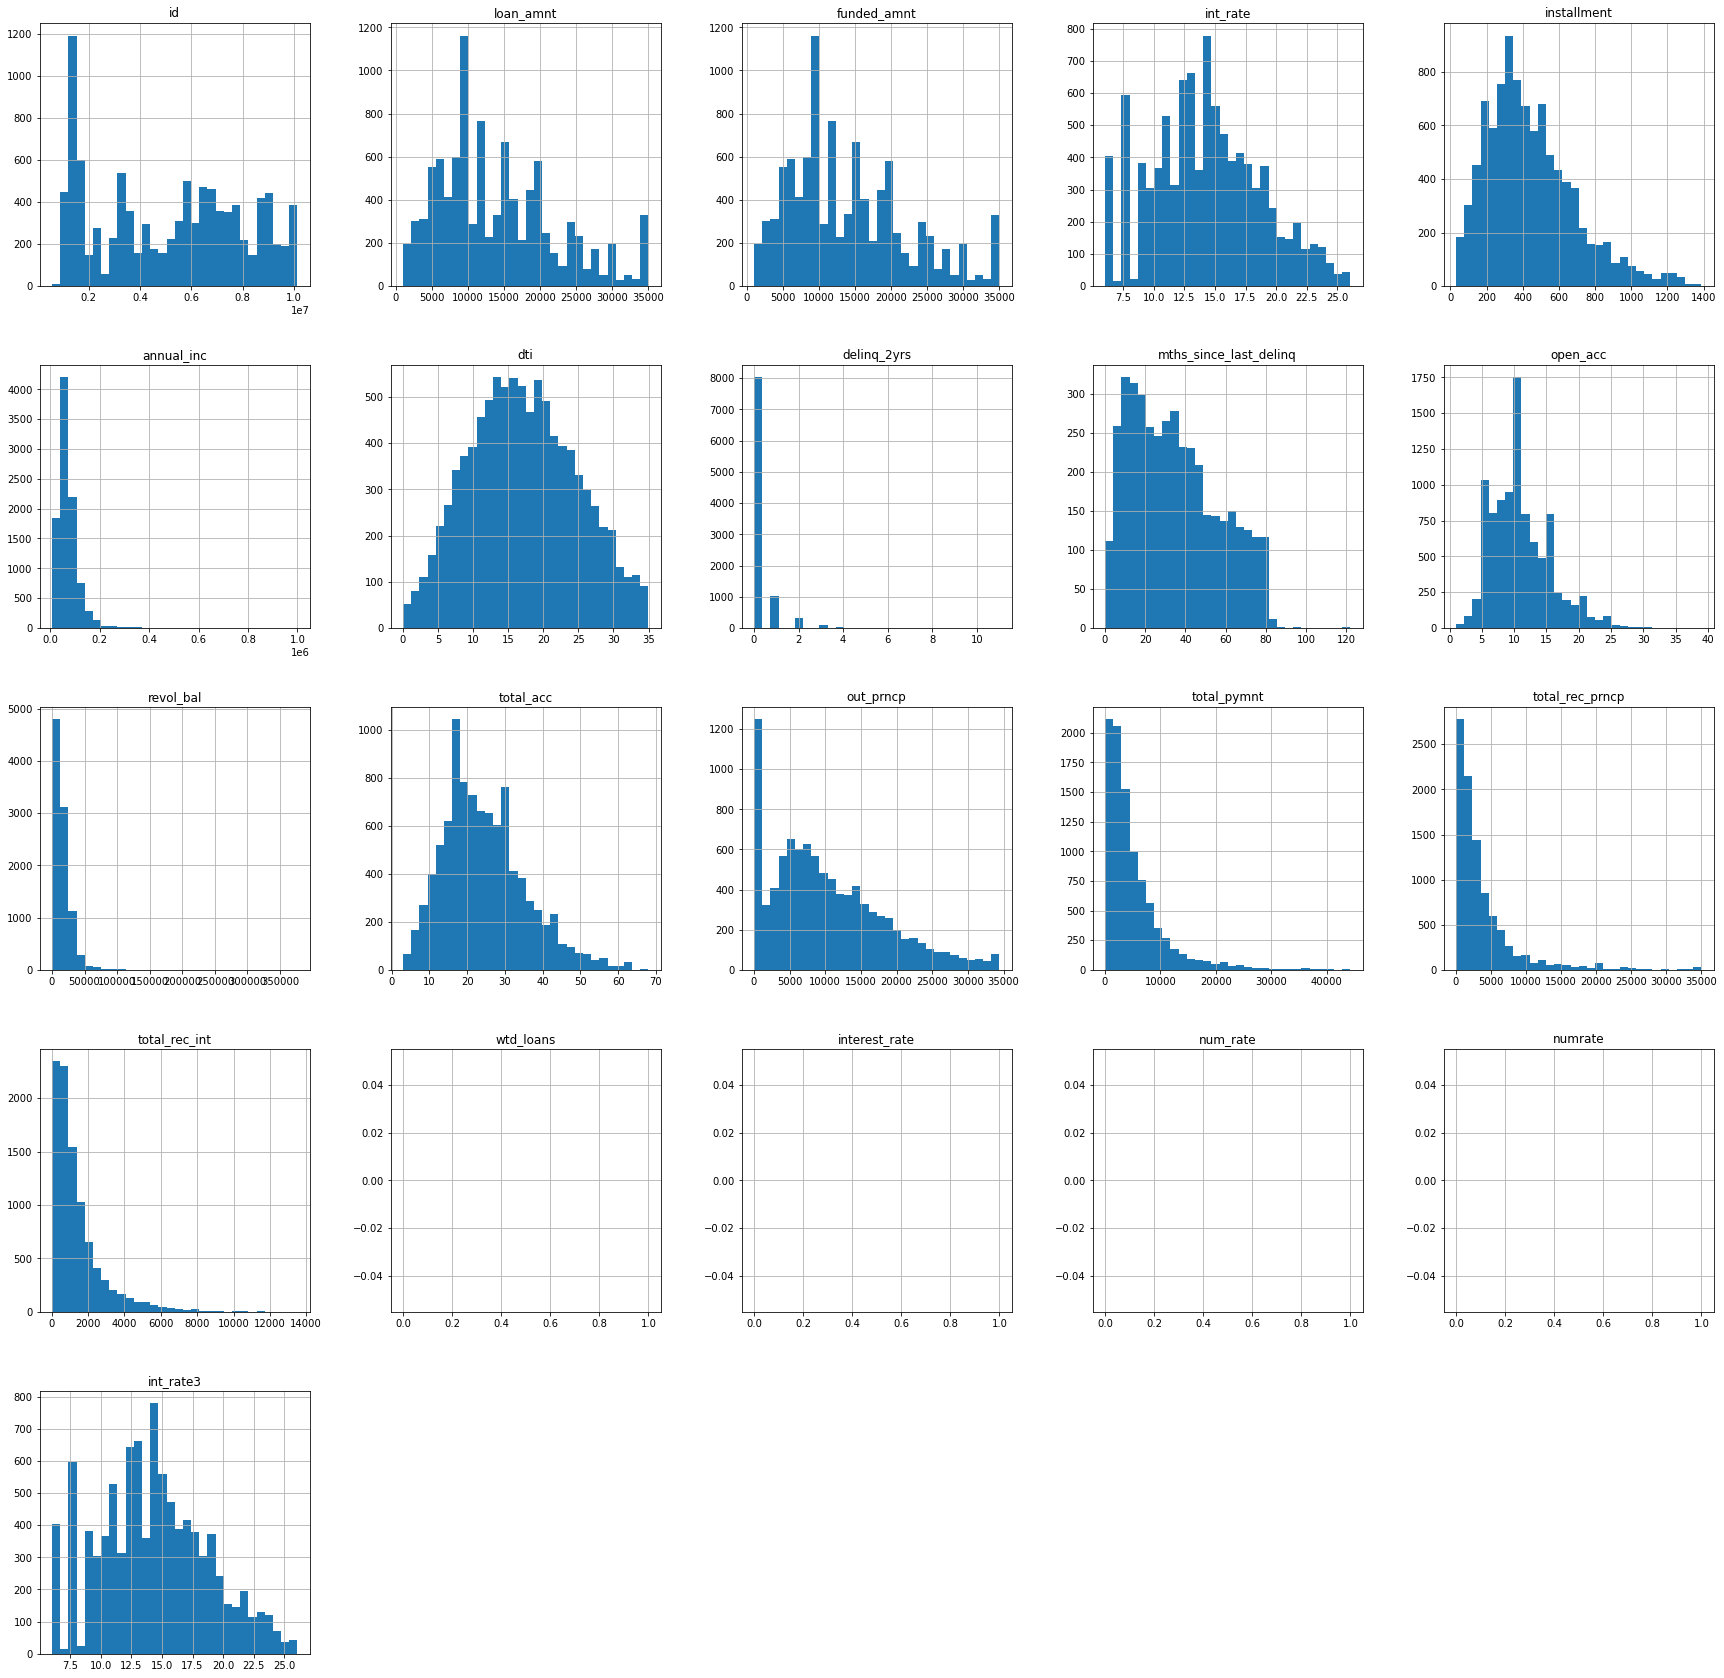

In [142]:
_ = num_attributes.hist(bins=30, figsize=(30,30))

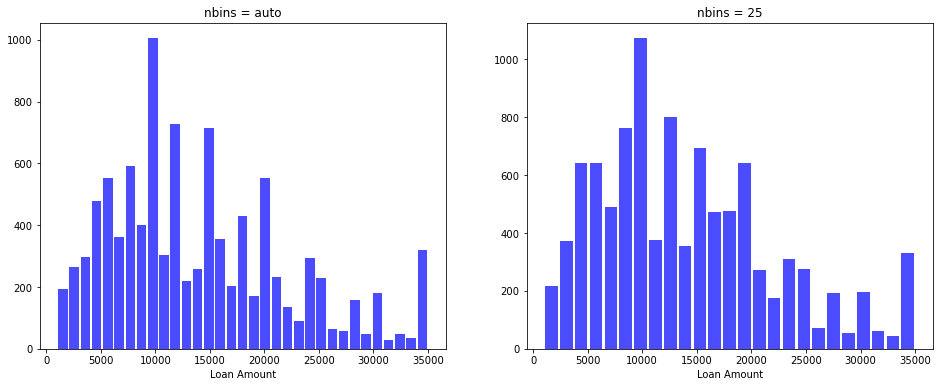

In [21]:
# looks at the distribution of loan amounts with a histogram
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
n, bins, patches = plt.hist(x=loan_data['loan_amnt'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.title("nbins = auto")
plt.xlabel("Loan Amount")

plt.subplot(1,2,2)
n, bins, patches = plt.hist(x=loan_data['loan_amnt'], bins=25, color='blue', alpha=0.7, rwidth=0.85)
plt.title("nbins = 25")
plt.xlabel("Loan Amount")

plt.show()

In [22]:
# checks how many types we have for each atribute
cat_attributes.apply(lambda x: x.unique().shape[0])

term                   3
emp_length            12
home_ownership         6
loan_status            8
purpose               14
addr_state            45
earliest_cr_line    9398
int_rate2            135
dtype: int64

# 3.0 Cross Tab and Pivot Tables

### 3.1 create a cross table of the loan purpose and loan status

In [32]:
pd.crosstab(loan_data['purpose'], loan_data['loan_status'], margins=True)

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All
purpose,,,,,,,,
car,0,68,0,12,0,0,1,81
credit_card,30,1957,4,180,7,6,30,2214
debt_consolidation,142,4829,10,556,32,9,87,5665
home_improvement,4,415,0,64,1,1,12,497
house,2,39,0,12,0,1,1,55
major_purchase,2,153,1,28,1,1,3,189
medical,4,56,0,9,2,0,1,72
moving,1,39,0,9,0,0,1,50
other,16,350,1,53,3,1,7,431


### Observations # 1
- Credit card and debt consolidation are the greatest loan purposes while renewable energy, moving and vacation are the least
- Car has the least charged offs and defaults while debt consolidation has the most.

## 3.2 create a cross table of the emoloyment length and loan status

In [42]:
pd.crosstab(loan_data['emp_length'], loan_data['loan_status'], margins=True)

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All
emp_length,,,,,,,,
1 year,15,486,0,67,6,3,6,583
10+ years,56,2614,5,316,8,6,49,3054
2 years,25,731,3,97,2,2,9,869
3 years,12,599,1,67,4,0,9,692
4 years,14,457,0,53,3,1,9,537
5 years,18,628,1,81,7,2,16,753
6 years,14,520,3,60,6,1,14,618
7 years,11,481,1,55,1,1,8,558
8 years,18,388,0,36,1,1,5,449


### Observations #2: loan status and employment length
- Most loans are from loan owner with employment length >= 10 years
- Loan owners with employment length of 9 years have the least charge offs

## 3.3 create a cross table of the home ownership and loan status

In [44]:
pd.crosstab(loan_data['home_ownership'], loan_data['loan_status'], margins=True)

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All
home_ownership,,,,,,,,
MORTGAGE,83,4171,8,478,20,10,69,4839
NONE,0,1,0,0,0,0,0,1
OTHER,0,1,0,0,0,0,0,1
OWN,18,696,2,88,7,1,16,828
RENT,117,3253,6,385,21,10,63,3855
All,218,8122,16,951,48,21,148,9524


### Observations #3: 
- Home owners have the least charge offs and defaults while Renters have the most charge offs and mortgage payers have the most defaults 

# 4.0 Determine the Scope and the Target Variable

In [116]:
## Frequency by loan status
df_agg = pd.DataFrame(loan_data.groupby('loan_status')['loan_amnt'].size()).reset_index()
df_agg.rename({'loan_amnt': 'loan_frequency'}, axis=1, inplace=True)
df_agg['perc_of_total_freq%'] = round(100 * df_agg['loan_frequency']/df_agg['loan_frequency'].sum(), 2)

In [117]:
## Loan amount by loan status
df_agg2 = pd.DataFrame(loan_data.groupby('loan_status')['loan_amnt'].sum()).reset_index()
df_agg2.rename({'loan_amnt': 'total_loan_amnt'}, axis=1, inplace=True)
df_agg2['perc_of_total_amnt%'] = round(100 * df_agg2['total_loan_amnt']/df_agg2['total_loan_amnt'].sum(), 2)

In [120]:
loan_status_statistics = pd.merge(df_agg, df_agg2)
#loan_status_statistics.loc['Total'] = loan_status_statistics.sum()
loan_status_statistics

,loan_status,loan_frequency,perc_of_total_freq%,total_loan_amnt,perc_of_total_amnt%
0,Charged Off,218,2.29,2862500,2.10
1,Current,8122,85.28,117253100,85.96
2,Default,16,0.17,281225,0.21
3,Fully Paid,951,9.99,12687950,9.30
4,In Grace Period,48,0.50,691575,0.51
5,Late (16-30 days),21,0.22,276675,0.20
6,Late (31-120 days),148,1.55,2348450,1.72


### 4.1 Data Transformation

In [183]:
from datetime import datetime

def create_duration_features(
    df_raw: pd.DataFrame,
    today_date: datetime,
    base_feature_name: str='earliest_cr_line',
) -> pd.DataFrame:
    
    df_raw['today'] = today_date
    
    df_raw[base_feature_name] = pd.to_datetime(df_raw[base_feature_name],
                                               format='%Y-%m-%d %H:%M:%S',
                                               errors='coerce')
    df_raw['mths_since_first_cr_line'] = round((df_raw['today'] - df_raw[base_feature_name]).dt.days / 30, 1)

    return df_raw

today_date = datetime.today()
raw_data = create_duration_features(loan_data, today_date)
raw_data.head()


good_status = ['Fully Paid']
default_status = ['Default', 'Charged Off']
    
loan_data["predicted_loan_status"] = np.where(
    loan_data["loan_status"].isin(good_status),
    'good',
    np.where(loan_data["loan_status"].isin(default_status),
            'bad',
            'inference'))
loan_data.head()

loan_bad = loan_data[loan_data['predicted_loan_status'] == 'bad'].copy()
loan_good = loan_data[loan_data['loan_status'] == 'good'].copy()

### Summary
Based on loan status, there are seven different types of loans. Among 9524 loans, Approximately 10% are fully paid, 2.5% are Charged Offs or Defaults, While the rest 87.5% are either Current, in Grace Period, or Late? So the question remains, among these 87.5% loans, which of them are likely to have be defaulted or charged off?

To answer the above question, we are able to build a machine learning model to predict: 
1. From any existing current loans, which ones are likely to default and be charged off ('bad loans') and which ones are likely to be fully paid ('good loans')?
2. For any new loans with the same features, which ones are likely to default and be charged off ('bad loans') and which ones are likely to be fully paid ('good loans')
3. With the probability of default, we are able to predict the overall affect on portfolio performance through estimating the total expected loss beforehand.

As a result, the model will be trained using loans with statuses within charged-offs or defaults (bad loans), and fully paid (good loans). We will make predictions using loans with the remaining statuses, including current, in grace period, late (16-30 days), and late (31-120 days).

# 5.0 Visualizing credit outliers

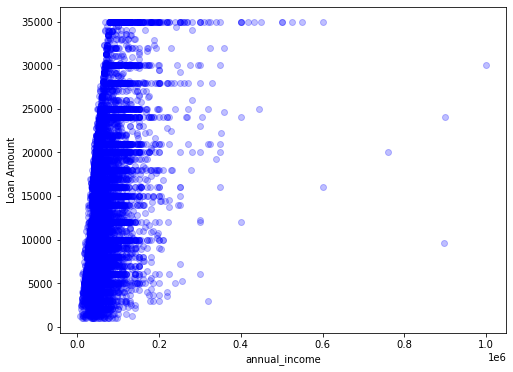

In [122]:
# creates the scatter plot for age and amount
plt.figure(figsize=(8, 6))
plt.scatter(loan_data['annual_inc'], loan_data['loan_amnt'], color='blue', alpha=0.25)
plt.xlabel("annual_income")
plt.ylabel("Loan Amount")
plt.show()

In [137]:
loan_data[loan_data['annual_inc'] > 650000]

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,...,total_pymnt,total_rec_prncp,total_rec_int,wtd_loans,interest_rate,int_rate2,num_rate,numrate,int_rate3,predicted_loan_status
4840,3157635,24000,24000,36 months,11.14,787.33,10+ years,MORTGAGE,900009.0,Current,...,10234.93,7761.64,2473.29,NaN,NaN,11.14%,NaN,NaN,11.14,inference
7665,8991879,20000,20000,36 months,14.30,686.48,7 years,MORTGAGE,760000.0,Fully Paid,...,20704.28,20000.00,704.28,NaN,NaN,14.30%,NaN,NaN,14.30,good
8069,10111035,9600,9600,36 months,11.99,318.82,1 year,RENT,897000.0,Current,...,637.58,447.99,189.59,NaN,NaN,11.99%,NaN,NaN,11.99,inference
9336,9008907,30000,30000,36 months,13.67,1020.53,10+ years,MORTGAGE,1000000.0,Fully Paid,...,30677.92,30000.00,677.92,NaN,NaN,13.67%,NaN,NaN,13.67,good


# 6.0 Checking missing data

In [139]:
# checks how many null records for each column 
loan_data.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
term                        476
int_rate                    476
installment                 476
emp_length                  881
home_ownership              476
annual_inc                  476
loan_status                 476
purpose                     476
addr_state                    0
dti                         476
delinq_2yrs                 476
earliest_cr_line            476
mths_since_last_delinq     5900
open_acc                    476
revol_bal                   476
total_acc                   476
out_prncp                   476
total_pymnt                 476
total_rec_prncp             476
total_rec_int               476
wtd_loans                 10000
interest_rate             10000
int_rate2                   476
num_rate                  10000
numrate                   10000
int_rate3                   476
predicted_loan_status         0
dtype: int64

# 7.0 Hypotheses Validation and Bivariate Analysis
1. Loans with higher interest rate are more likely to default. (TRUE)
2. People with longer employment length are likely to have shorter default cases. (FALSE)
3. homeowner: Rent have more cases of default, followed by Mortgage and own. (TRUE)
4. People who default have lower income than people who not default (TRUE)
5. purpose of loan: There are more cases of default for personal than any other intent. (FALSE). The least cases of default are for moving and renwable Energy.
6. dti: The higher the DTI, the more are the cases of default. (TRUE)
7. deling_2yrs: If the borrower have more credit delinquencies in the last 2 years, they are more likely to default. (FALSE) Borrowers with more credit delinquencies in the last 2 years are LESS LIKELY to default.
8. earliest_cr_line: People with longer credit history are less likely to default. (TRUE)

#### H1: Loans with higher interest rate are more likely to default. (TRUE)

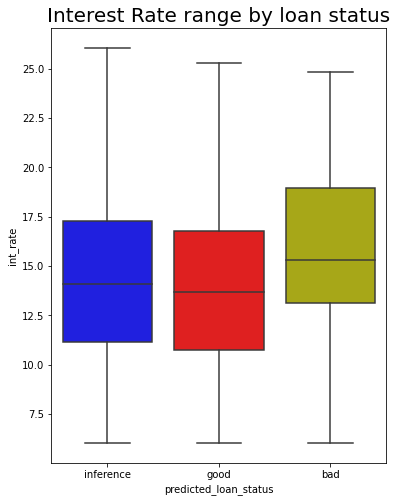

In [147]:
# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(6, 8)

# plots the graph
sns.boxplot(x='predicted_loan_status', y='int_rate',  data=loan_data, showfliers=False, palette=["b", "r", "y"])

# sets plot title
ax.set_title("Interest Rate range by loan status", fontsize=20)

# display plots
plt.show()

### H2. People with longer employment length are likely to have shorter default cases. (FALSE)

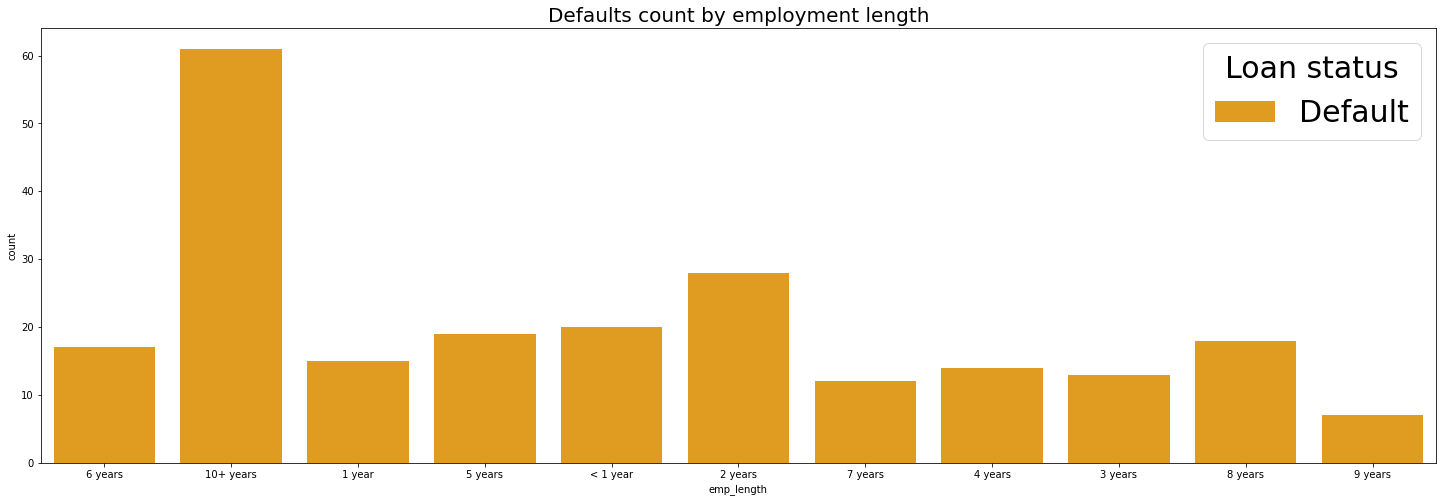

In [160]:
# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(25, 8)

# plots the graph
sns.countplot(x='emp_length', hue='predicted_loan_status', data=loan_bad, palette=["orange"])

# sets plot title
ax.set_title("Defaults count by employment length", fontsize=20)

# sets the legend
plt.legend(title="Loan status", labels=['Default'], title_fontsize=30, fontsize=30)

# display plots
plt.show()

### H3. homeowner: Rent have more cases of default, followed by Mortgage and own. (TRUE)

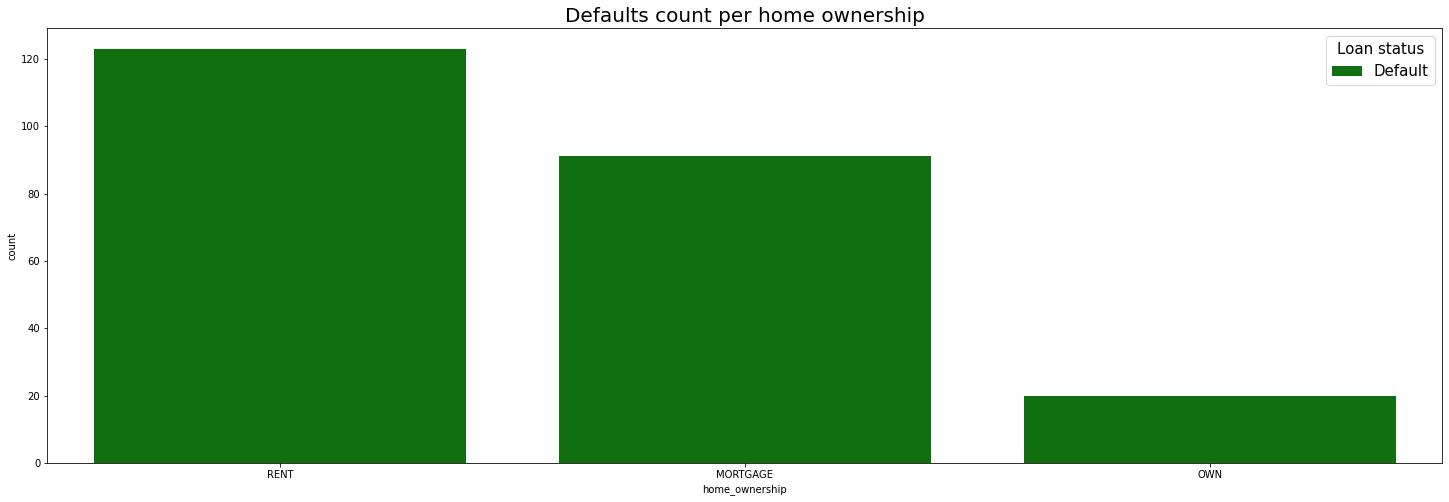

In [166]:
# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(25, 8)

# plots the graph
sns.countplot(x='home_ownership', hue='predicted_loan_status', data=loan_bad, 
              order=loan_bad['home_ownership'].value_counts().index, palette=["green"])

# sets plot title
ax.set_title("Defaults count per home ownership", fontsize=20)

# sets the legend
plt.legend(title="Loan status", labels=['Default'], title_fontsize=15, fontsize=15)

# display plots
plt.show()

### H4: People who default have lower income than people who not default (TRUE)

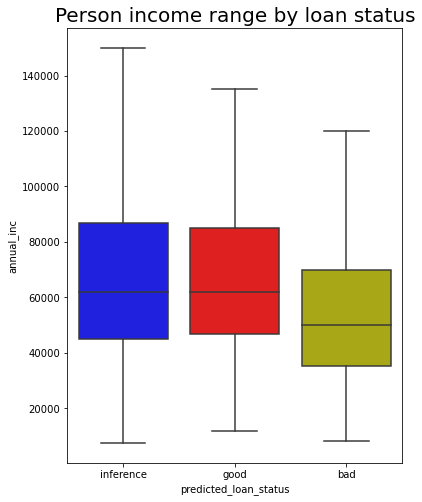

In [167]:
# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(6, 8)

# plots the graph
sns.boxplot(x='predicted_loan_status', y='annual_inc',  data=loan_data, showfliers=False, palette=["b", "r", "y"])

# sets plot title
ax.set_title("Person income range by loan status", fontsize=20)


# display plots
plt.show()

### H5: purpose of loan: There are more cases of default for personal than any other intent. (FALSE). The least cases of default are for moving and renwable Energy.

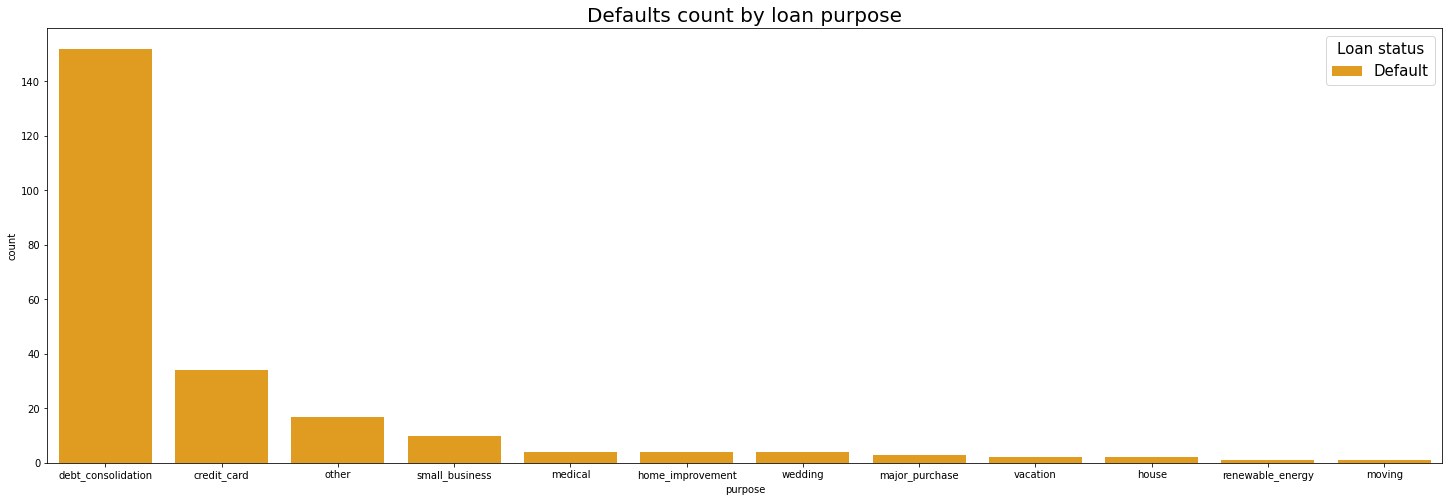

In [170]:
# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(25, 8)

# plots the graph
sns.countplot(x='purpose', hue='predicted_loan_status', data=loan_bad, 
              order=loan_bad['purpose'].value_counts().index, palette=["orange"])

# sets plot title
ax.set_title("Defaults count by loan purpose", fontsize=20)

# sets the legend
plt.legend(title="Loan status", labels=['Default'], title_fontsize=15, fontsize=15)

# display plots
plt.show()

### H6. dti: The higher the DTI, the more are the cases of default. (TRUE)

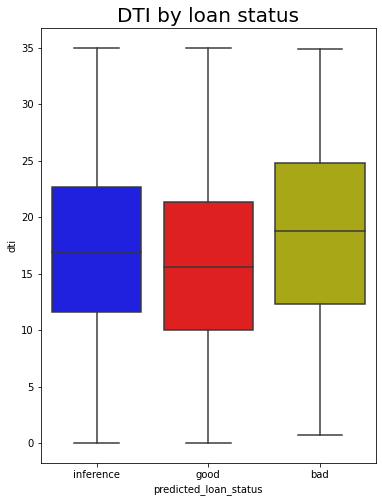

In [173]:
# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(6, 8)

# plots the graph
sns.boxplot(x='predicted_loan_status', y='dti',  data=loan_data, showfliers=False, palette=["b", "r", 'y'])

# sets plot title
ax.set_title("DTI by loan status", fontsize=20)

# display plots
plt.show()

### H7. delinq_2yrs: If the borrower have more credit delinquencies in the last 2 years, they are more likely to default. (FALSE) Borrowers with more credit delinquencies in the last 2 years are LESS LIKELY to default.

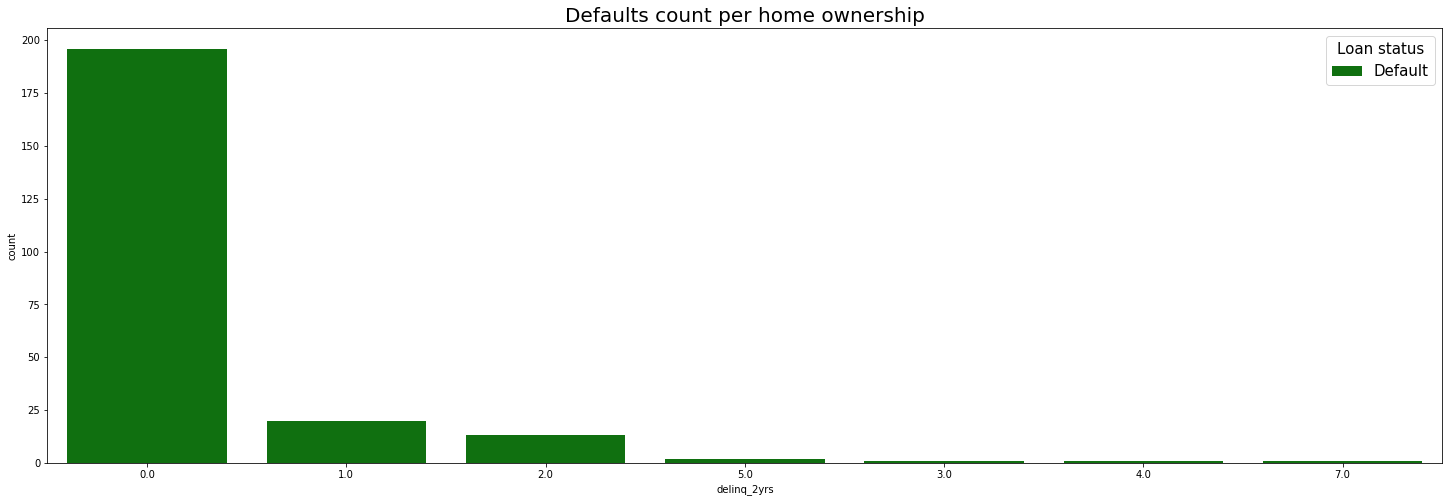

In [177]:
# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(25, 8)

# plots the graph
sns.countplot(x='delinq_2yrs', hue='predicted_loan_status', data=loan_bad, 
              order=loan_bad['delinq_2yrs'].value_counts().index, palette=["green"])

# sets plot title
ax.set_title("Defaults count per home ownership", fontsize=20)

# sets the legend
plt.legend(title="Loan status", labels=['Default'], title_fontsize=15, fontsize=15)

# display plots
plt.show()

### H8: earliest_cr_line: People with longer credit history are less likely to default. (TRUE)

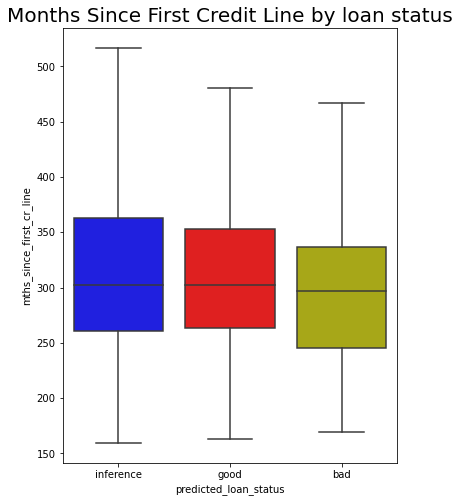

In [184]:
# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(6, 8)

# plots the graph
sns.boxplot(x='predicted_loan_status', y='mths_since_first_cr_line',  data=loan_data, showfliers=False, palette=["b", "r", 'y'])

# sets plot title
ax.set_title("Months Since First Credit Line by loan status", fontsize=20)

# display plots
plt.show()

# 8.0 Multivariate Analysis - Correlations

## 8.1 Correlation between numerical attributes

In [201]:
num_attributes = num_attributes.drop(['id', 'wtd_loans', 'interest_rate', 'numrate', 'num_rate', 'int_rate3']
                                     , axis=1)

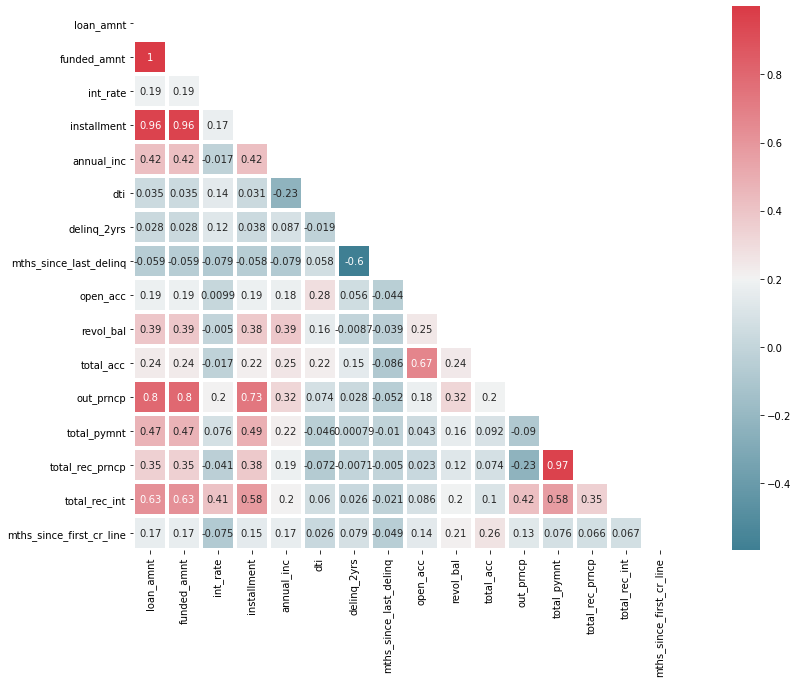

In [202]:
# gets the correlation between the numerical variables
correlation = num_attributes.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(20, 10)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlation, cmap=cmap, mask=mask, square=True, linewidths=3, annot=True)

# displays the plot
plt.show()

# 9 Total Expected Loss

In [6]:
output = pd.read_csv('predictions_data.csv')

In [8]:
output.shape

(8815, 5)

In [9]:
# prints the first five rows of the prediction of current loans which do not have their statuses closed
output.head()

,Unnamed: 0,ID,funded_loan_amount,prediction,default_probability
0,0,571203,18000.0,good,0.316878
1,1,694891,15675.0,good,0.437776
2,2,784712,16500.0,good,0.346945
3,3,974654,6400.0,good,0.206091
4,4,1042871,6250.0,good,0.199182


In [20]:
output_default = output.loc[output['prediction'] == 'bad']
# loss given default is 100%
output_default['loss_given_default'] = 1.0

In [23]:
# calculates the bank's expected loss and assign it to a new column
output_default['expected_loss'] = output_default['default_probability'] * output_default['loss_given_default'] * output_default['funded_loan_amount']

# calculates the total expected loss to two decimal places
total_exp_loss = round(np.sum(output_default['expected_loss']), 2)

# prints the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(total_exp_loss))

Total expected loss:  $654,041.39
